# Binary Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
%matplotlib inline

In [2]:
train_df = pd.read_csv("working_data/trial_promo_training.csv")
test_df = pd.read_csv("working_data/trial_promo_testing.csv")

### Add binary target

In [3]:
train_df["decision_binary"] = train_df["decision"].apply(lambda x: 0 if x == "None" else 1)
test_df["decision_binary"] = test_df["decision"].apply(lambda x: 0 if x == "None" else 1)

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data balancing using equal classes strategy

In [5]:
should_balance = False

In [6]:
number_of_nones = train_df[train_df["decision_binary"] == 0].shape[0]
nones_df = train_df[train_df["decision_binary"] == 0]
purchase_df = train_df[train_df["decision_binary"] == 1]
print("Number of None's: " + str(nones_df.shape[0]))
print("Increase purchase by: " + str(number_of_nones - purchase_df.shape[0]))
print("Number of purchase: " + str(purchase_df.shape[0]))
times_to_increase_purchase_df = (number_of_nones - purchase_df.shape[0])//purchase_df.shape[0]
print("Purchase records to be increased by {} times".format(times_to_increase_purchase_df))

Number of None's: 704
Increase purchase by: 558
Number of purchase: 146
Purchase records to be increased by 3 times


In [7]:
if should_balance:
    repeated_purchase = [purchase_df] * times_to_increase_purchase_df
    repeated_purchase_df = pd.concat(repeated_purchase)
    dfs_to_concat = [nones_df, repeated_purchase_df]
    train_df = pd.concat(dfs_to_concat)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print("New # rows: " + str(train_df.shape[0]))
    train_df.head()
else:
    print("Training data will not be balanced")

Training data will not be balanced


In [8]:
features_to_scale = ["age", "income", "avbal", "avtrans"]
columns_to_drop_for_nn = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
target_columns = ["decision", "decision_binary"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df[features_to_scale] = min_max_scaler.fit_transform(train_df[features_to_scale])

train_df.head()

,age,income,avbal,avtrans,decision,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4,decision_binary
0,0.305455,0.531577,0.376668,0.501373,None,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.660590,0.188136,0.247499,0.218151,None,0,1,8,0,2,...,1,0,0,0,0,0,1,0,0,0
2,0.342193,0.312063,0.497068,0.214702,None,1,0,4,3,2,...,0,0,0,1,0,0,1,0,0,0
3,0.373922,0.142970,0.145024,0.376441,None,0,1,2,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0.138464,0.495546,0.388331,0.472158,None,1,2,5,3,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
X_train = train_df.drop(target_columns, axis=1)
X_train = X_train.drop(columns_to_drop_for_nn, axis=1)
y_train = train_df["decision_binary"]
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.305455,0.531577,0.376668,0.501373,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.660590,0.188136,0.247499,0.218151,1,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0.342193,0.312063,0.497068,0.214702,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.373922,0.142970,0.145024,0.376441,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.138464,0.495546,0.388331,0.472158,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [10]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: decision_binary, dtype: int64

In [11]:
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

X_test = test_df.drop(target_columns, axis=1)
X_test = X_test.drop(columns_to_drop_for_nn, axis=1)
y_test = test_df["decision_binary"]
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.543279,0.650859,0.375240,0.239193,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.565127,0.239707,0.123624,0.173393,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,0.307821,0.037887,0.193715,0.143784,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.247286,0.556982,0.424065,0.942380,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.258280,0.060213,0.149547,0.093710,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Build different models

### Neural network

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Training accuracy

In [13]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8, 4), random_state= 42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[697   7]
 [130  16]]
0.8388235294117647


### Testing accuracy

In [14]:
y_test_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,120,4
1,24,2


In [15]:
print("accuracy:", accuracy_score(y_test, y_test_pred))

accuracy: 0.8133333333333334


In [16]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8333,0.9677,0.8955,124
1,0.3333,0.0769,0.1250,26


## Random forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
columns_for_rf = ["age", "income", "avbal", "avtrans", "sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
X_train_rf = train_df[columns_for_rf]
y_train_rf = train_df["decision_binary"]

X_train_rf.head()

,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum
0,0.305455,0.531577,0.376668,0.501373,0,1,0,0,0
1,0.660590,0.188136,0.247499,0.218151,0,1,8,0,2
2,0.342193,0.312063,0.497068,0.214702,1,0,4,3,2
3,0.373922,0.142970,0.145024,0.376441,0,1,2,0,1
4,0.138464,0.495546,0.388331,0.472158,1,2,5,3,0


In [18]:
clf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=1000)
clf.fit(X_train_rf, y_train_rf)

y_train_pred = clf.predict(X_train_rf)
print(y_train_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 

In [19]:
cf_matrix = confusion_matrix(y_train_rf, y_train_pred, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,704,0
1,19,127


In [20]:
print("train accuracy:", accuracy_score(y_train_rf, y_train_pred))

train accuracy: 0.9776470588235294


In [21]:
X_test_rf = test_df[columns_for_rf]
y_test_rf = test_df["decision_binary"]

y_test_pred = clf.predict(X_test_rf)
cf_matrix = confusion_matrix(y_test_rf, y_test_pred)
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,122,2
1,25,1


In [22]:
print("test accuracy:", accuracy_score(y_test_rf, y_test_pred))

test accuracy: 0.82


In [23]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_rf, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8299,0.9839,0.9004,124
1,0.3333,0.0385,0.0690,26


## XGBoost Classifier

In [24]:
#!conda update scikit-learn

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

cv_params = {'max_depth': [3,5,7,10], 'min_child_weight': [1,3,5,7]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params,
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [26]:
optimized_GBM.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, retu

In [27]:
#!optimized_GBM.grid_scores_

In [28]:
y_test_pred = optimized_GBM.predict(X_test_rf)
cf_matrix = confusion_matrix(y_test_rf, y_test_pred)
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,115,9
1,21,5


In [29]:
print("test accuracy:", accuracy_score(y_test_rf, y_test_pred))

test accuracy: 0.8


In [30]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_rf, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8456,0.9274,0.8846,124
1,0.3571,0.1923,0.2500,26


### Build a neural network using Keras

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(42)

Using TensorFlow backend.


In [32]:
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.305455,0.531577,0.376668,0.501373,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.660590,0.188136,0.247499,0.218151,1,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0.342193,0.312063,0.497068,0.214702,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.373922,0.142970,0.145024,0.376441,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.138464,0.495546,0.388331,0.472158,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [33]:
num_features = X_train.shape[1]
print("num_features:", num_features)

num_features: 28


In [34]:
# create model
num_features = X_train.shape[1]
model = Sequential()
model.add(Dense(12, input_dim=num_features, activation='relu', init='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                348       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 24        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total para

C:\Users\issuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=28, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [35]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=2)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=2)

In [37]:
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None)
checkpoint = ModelCheckpoint('models/model-{epoch:03d}-{val_acc:.2f}.h5', verbose=0, monitor='val_acc',save_best_only=True, mode='auto')  

In [38]:
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=50, verbose=0, validation_data = (X_test, y_test_one_hot), callbacks = [es, checkpoint])

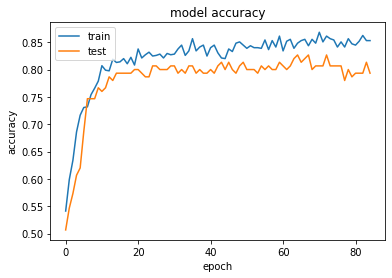

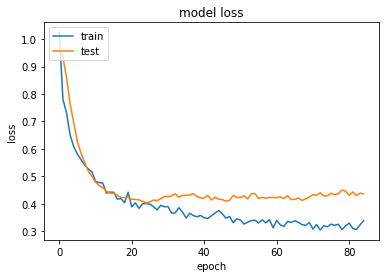

In [39]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training confusion matrix and accuracy

In [40]:
keras_nn_predictions_train = model.predict(X_train)
keras_nn_predictions_train = np.argmax(keras_nn_predictions_train, axis=1)
cf_matrix = confusion_matrix(y_train, keras_nn_predictions_train, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,695,9
1,110,36


In [41]:
print("train accuracy:", accuracy_score(y_train, keras_nn_predictions_train))

train accuracy: 0.86


### Testing confusion matrix and accuracy

In [42]:
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.543279,0.650859,0.375240,0.239193,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.565127,0.239707,0.123624,0.173393,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,0.307821,0.037887,0.193715,0.143784,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.247286,0.556982,0.424065,0.942380,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.258280,0.060213,0.149547,0.093710,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [43]:
# evaluate the model
scores = model.evaluate(X_test, y_test_one_hot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

150/150 [==============================] - 0s 53us/step

acc: 79.33%


In [44]:
keras_nn_predictions = model.predict(X_test)
len(keras_nn_predictions)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
len(keras_nn_predictions)
keras_nn_predictions
cf_matrix = confusion_matrix(y_test, keras_nn_predictions, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,117,7
1,24,2


In [45]:
print("test accuracy:", accuracy_score(y_test, keras_nn_predictions))

test accuracy: 0.7933333333333333


In [46]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, keras_nn_predictions, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8298,0.9435,0.8830,124
1,0.2222,0.0769,0.1143,26


# Save the best model for later usage

In [47]:
model.save('models/NN_66_40.h5')

### Load the model and check

In [48]:
model_name = "NN_66_40.h5"

In [49]:
from keras.models import load_model
model = load_model('models/'+model_name)
keras_nn_predictions = model.predict(X_test)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
cm = confusion_matrix(y_test, keras_nn_predictions)
print(cm)
print(accuracy_score(y_test, keras_nn_predictions))

[[117   7]
 [ 24   2]]
0.7933333333333333


Confusion matrix, without normalization
[[117   7]
 [ 24   2]]


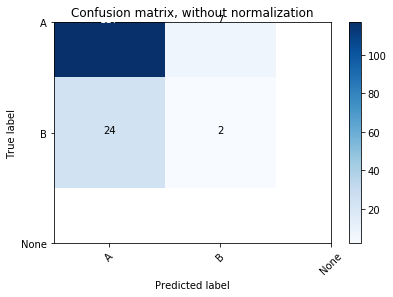

In [50]:
plot_confusion_matrix(cm, classes=["A", "B", "None"],
                      title='Confusion matrix, without normalization')

### This model gives less than 50 % class accuracy on products A and B and predicts it as none